In [6]:
import torch
import numpy as np
import datasets
import os
import umap
import evaluate
import accelerate
from pathlib import Path
from itertools import product
from IPython.core.debugger import set_trace
from datasets import Dataset, DatasetDict
from torch import nn
from torch.nn import functional as F
from sentence_transformers import SentenceTransformer
from nltk import sent_tokenize
from IPython.core.debugger import Pdb
from matplotlib import pyplot as plt
from transformers import AutoModel, AutoTokenizer
from pprint import pprint
from scipy.stats import spearmanr
from tqdm import tqdm

# mltk stuff
import mltoolkit as mltk
from mltoolkit.utils import files, display
os.chdir(files.project_root())
display.note(f'changed directory to \'{os.getcwd()}\'')

datasets.disable_caching()

# Set this to whatever you want
seed = 10

torch.manual_seed(seed)
np.random.seed(seed)

%load_ext autoreload
%autoreload 2
%matplotlib inline

[NOTE] changed directory to '/data/john/projects/mltoolkit'
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:

ds = datasets.load_dataset('cnn_dailymail', '3.0.0')

print(ds)

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


/home/john/miniconda3/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [20]:
sent_counts = np.zeros(len(ds['train']))

for i, sample in tqdm(enumerate(ds['train']), total=len(ds['train'])):
    sent_counts[i] = len(sent_tokenize(sample['article']))


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 287113/287113 [02:57<00:00, 1616.36it/s]


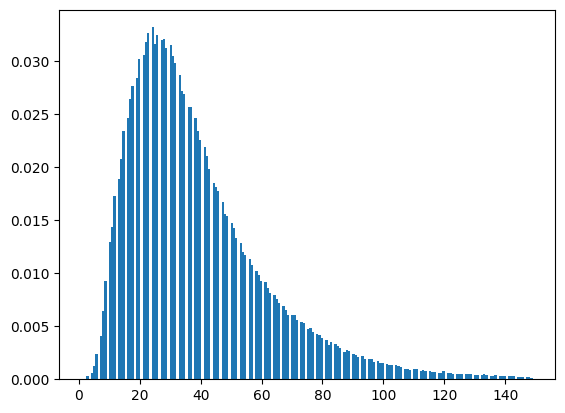

In [19]:
sent_counts_filtered = sent_counts[sent_counts < 150]
_ = plt.hist(sent_counts_filtered, bins=200, density=True)